<a href="https://colab.research.google.com/github/umiSirya/MachineLearning_2/blob/main/Principal_Component_Analysis(PCA)_wine_quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [3]:
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Standardize the data

In [5]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA and getting variance of the components

In [6]:
# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Variance explained by each component
explained_variance= pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

Variance

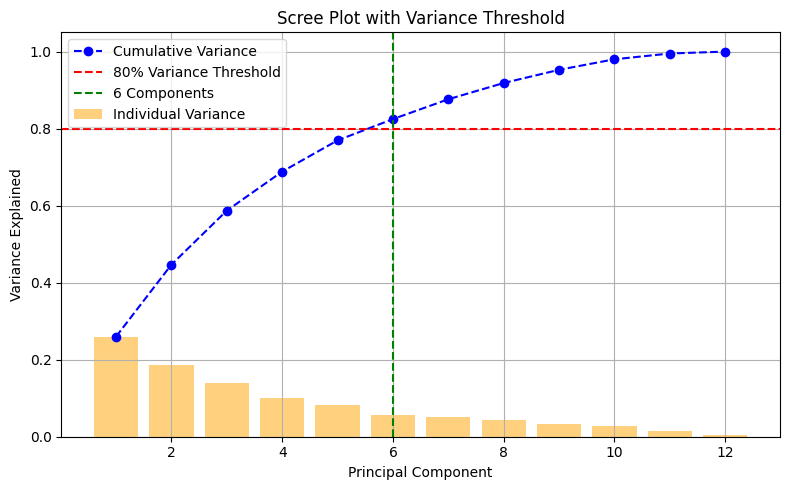

In [15]:
variance_threshold = 0.80

# Scree plot
plt.figure(figsize=(8, 5))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance', color='b')
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Individual Variance', color='orange')
plt.axhline(y=variance_threshold, color='red', linestyle='--', label=f'{int(variance_threshold * 100)}% Variance Threshold')

num_components = np.argmax(cumulative_variance >= variance_threshold) + 1
plt.axvline(x=num_components, color='green', linestyle='--', label=f'{num_components} Components')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot with Variance Threshold')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


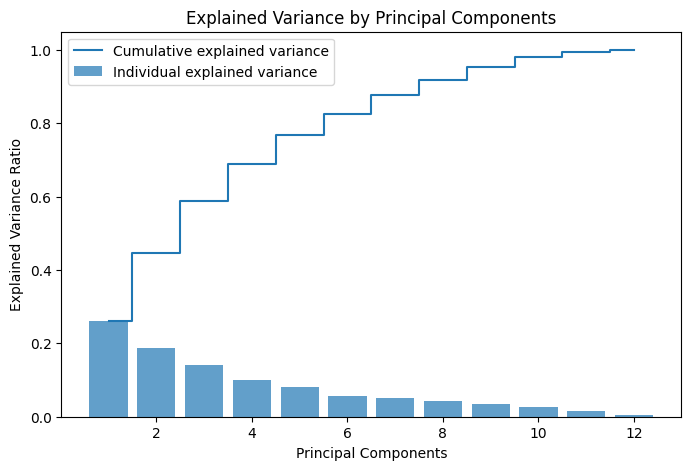

In [8]:
# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()



In [9]:
# Choose the number of components (e.g., 2 for visualization)
n_components = 2
pca_2d = PCA(n_components=n_components)
X_pca_2d = pca_2d.fit_transform(scaled_data)

# Reconstruction of data
X_reconstructed = pca_2d.inverse_transform(X_pca_2d)

# Calculate Reconstruction Error
reconstruction_error = mean_squared_error(scaled_data, X_reconstructed)
print(f"Reconstruction Error: {reconstruction_error:.4f}")

Reconstruction Error: 0.5531


In [10]:
# Explained Variance for selected components
explained_variance_selected = pca_2d.explained_variance_ratio_
cumulative_variance_selected = explained_variance_selected.sum()
print(f"Explained Variance Ratio (for {n_components} components): {explained_variance_selected}")
print(f"Cumulative Variance Explained (for {n_components} components): {cumulative_variance_selected:.4f}")


Explained Variance Ratio (for 2 components): [0.26009731 0.1868235 ]
Cumulative Variance Explained (for 2 components): 0.4469


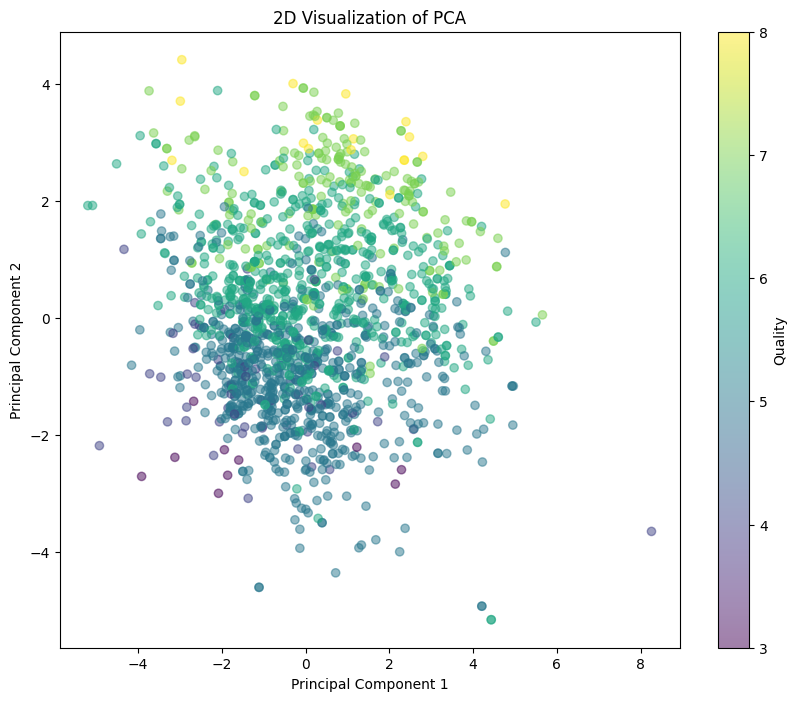

In [11]:
# 2D Visualization of PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=df['quality'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of PCA')
plt.colorbar(label='Quality')
plt.show()

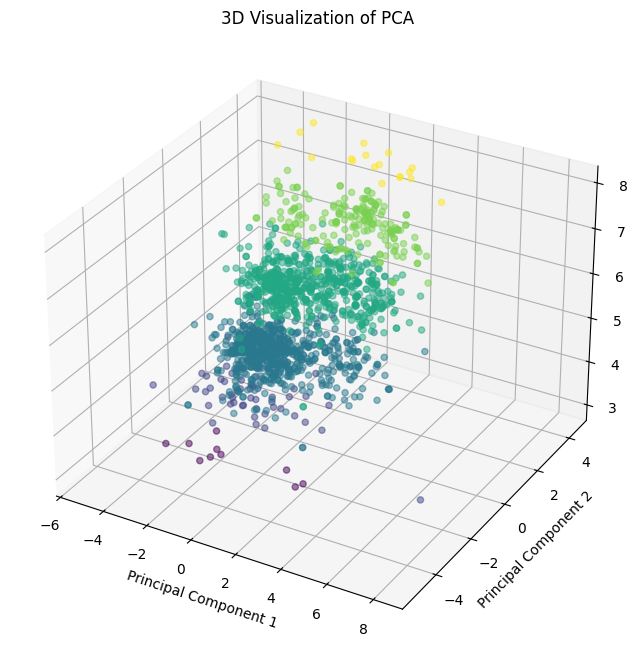

In [12]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], df['quality'], c=df['quality'], cmap='viridis', alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Quality')
ax.set_title('3D Visualization of PCA')
plt.show()